<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile

In [ ]:
data="/content/drive/MyDrive/covid19xray.zip"

In [ ]:
with ZipFile(data,"r") as  zip1:
  zip1.printdir()
  zip1.extractall()

File Name                                             Modified             Size
covid_19.csv                                   2021-02-21 23:28:16    315188676
covid_19_128.csv                               2021-02-21 23:28:46    229512928
covid_19_128_RGB.csv                           2021-02-21 23:29:10    688790962
covid_19_227.csv                               2021-02-21 23:29:52    721842831


In [ ]:
import pandas as pd

files=pd.read_csv("/content/covid_19.csv")

In [ ]:
files.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,label
0,6.0,12.0,30.0,39.0,50.0,61.0,69.0,72.0,74.0,77.0,76.0,84.0,86.0,86.0,93.0,91.0,95.0,149.0,132.0,122.0,122.0,119.0,123.0,123.0,132.0,132.0,145.0,137.0,127.0,106.0,111.0,116.0,119.0,123.0,128.0,126.0,121.0,117.0,109.0,100.0,...,191.0,196.0,196.0,196.0,193.0,197.0,194.0,189.0,186.0,182.0,181.0,187.0,187.0,191.0,175.0,156.0,147.0,158.0,181.0,156.0,105.0,86.0,64.0,41.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,7.0,35.0,59.0,72.0,83.0,99.0,104.0,108.0,106.0,101.0,110.0,113.0,112.0,119.0,117.0,118.0,125.0,132.0,150.0,137.0,158.0,161.0,150.0,189.0,169.0,155.0,175.0,171.0,187.0,182.0,169.0,163.0,168.0,165.0,163.0,171.0,...,199.0,193.0,166.0,169.0,166.0,165.0,159.0,158.0,163.0,162.0,146.0,163.0,154.0,168.0,153.0,149.0,144.0,143.0,131.0,114.0,123.0,127.0,116.0,109.0,100.0,78.0,49.0,33.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,16.0,31.0,41.0,57.0,60.0,68.0,71.0,83.0,88.0,86.0,99.0,101.0,102.0,102.0,154.0,165.0,140.0,141.0,147.0,142.0,158.0,164.0,103.0,98.0,97.0,91.0,89.0,86.0,79.0,77.0,72.0,65.0,55.0,40.0,41.0,32.0,23.0,16.0,0.0,0.0,...,183.0,125.0,117.0,128.0,125.0,138.0,154.0,154.0,154.0,152.0,152.0,137.0,152.0,152.0,160.0,161.0,165.0,169.0,166.0,156.0,171.0,177.0,156.0,141.0,144.0,113.0,84.0,67.0,43.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,6.0,17.0,33.0,40.0,50.0,60.0,63.0,76.0,82.0,90.0,91.0,94.0,94.0,94.0,97.0,93.0,156.0,148.0,141.0,132.0,128.0,130.0,133.0,194.0,75.0,77.0,86.0,92.0,95.0,98.0,98.0,98.0,95.0,94.0,92.0,92.0,80.0,69.0,...,180.0,183.0,193.0,165.0,151.0,155.0,176.0,163.0,164.0,162.0,163.0,162.0,166.0,164.0,168.0,177.0,168.0,154.0,169.0,168.0,160.0,152.0,145.0,130.0,125.0,109.0,91.0,80.0,54.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,39.0,38.0,38.0,39.0,38.0,38.0,38.0,39.0,39.0,38.0,39.0,38.0,38.0,39.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,37.0,38.0,37.0,36.0,36.0,36.0,38.0,42.0,44.0,45.0,46.0,48.0,50.0,51.0,53.0,56.0,...,117.0,114.0,117.0,116.0,117.0,118.0,118.0,117.0,115.0,116.0,119.0,116.0,118.0,117.0,117.0,116.0,115.0,117.0,117.0,116.0,120.0,120.0,118.0,120.0,121.0,123.0,125.0,124.0,126.0,126.0,125.0,126.0,127.0,129.0,129.0,129.0,132.0,131.0,135.0,1


In [ ]:
print(' DataFrame shape: ',files.shape)
print(' {} images '.format(files.shape[0]))
print(' {} images {} * {} pixels '.format(files.shape[1],150,150))

 DataFrame shape:  (2491, 22501)
 2491 images 
 22501 images 150 * 150 pixels 


In [ ]:
label_count = pd.Series(files['label'].values.ravel()).value_counts()
print('Class 0 - Normal:\t',label_count[0])
print('Class 1 - Covid: \t',label_count[1])

Class 0 - Normal:	 1583
Class 1 - Covid: 	 908


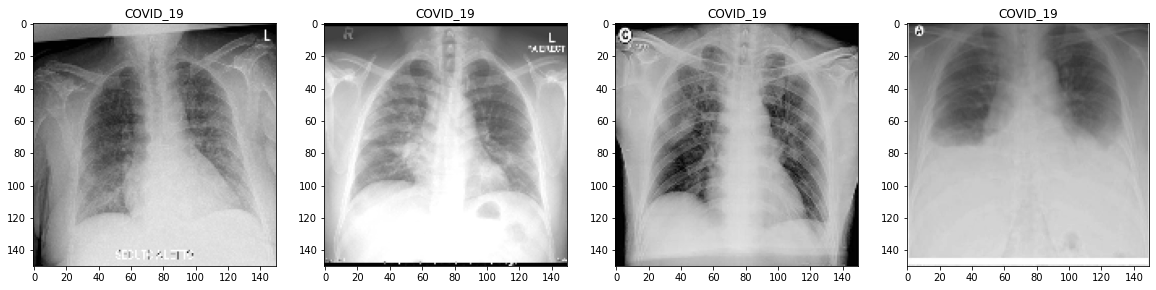

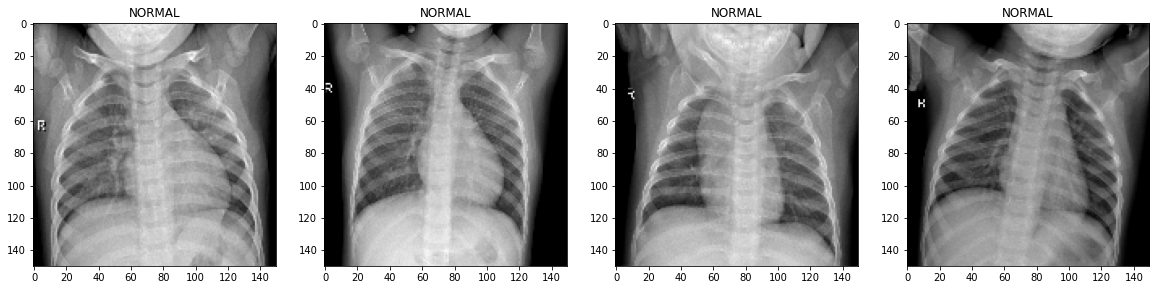

In [ ]:
import matplotlib.pyplot as plt
def getClassName(item):
    if item == 1:
        return 'COVID_19'
    if item == 0:
        return 'NORMAL'

def print_images(samples):  
    images = samples.drop(["label"],axis = 1).to_numpy()
    labels = samples['label'].to_numpy()
    
    fig=plt.figure(figsize=(20, 8))
    columns = 4
    rows = 1
    
    for i in range(len(samples)):
        fig.add_subplot(rows,columns,i + 1)
        title = '{}'.format(getClassName(labels[i]))
        Sample_image = images[i].reshape(150,150)
        plt.imshow(Sample_image,cmap='gray')
        plt.title(title)
    plt.show()    

covid_samples = (files[files['label']==1].iloc[5:9])
print_images(covid_samples)

normal_samples = (files[files['label']==0].iloc[5:9])
print_images(normal_samples)
%matplotlib inline

In [ ]:
features = files.drop(["label"],axis = 1).to_numpy()
labels = files['label'].to_numpy()

from sklearn.model_selection import StratifiedShuffleSplit
stratified_sample = StratifiedShuffleSplit(n_splits=3, test_size=0.1, random_state=73)

for train_index, test_index in stratified_sample.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [ ]:
X_train.shape

(2241, 22500)

In [ ]:
y_train.shape

(2241,)

In [ ]:
X_test.shape

(250, 22500)

In [ ]:
y_test.shape

(250,)

In [ ]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [ ]:
X_train_nn = X_train_norm.reshape(-1,150,150,1)
X_test_nn = X_test_norm.reshape(-1,150,150,1)
input_shape = X_train_nn.shape[1:]

print(input_shape)

(150, 150, 1)


In [ ]:
import tensorflow as tf
tf.random.set_seed(73)

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation, Flatten

model = tf.keras.models.Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation=tf.nn.sigmoid))



In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr=0.0001, decay=1e-5),loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               44859904  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [ ]:
history = model.fit(X_train_nn ,y_train, epochs=50,
                            validation_data = (X_test_nn, y_test),
                            batch_size=32)


Epoch 1/50
71/71 [==============================] - 36s 42ms/step - loss: 0.5477 - accuracy: 0.6936 - val_loss: 0.1626 - val_accuracy: 0.9280
Epoch 2/50
71/71 [==============================] - 2s 33ms/step - loss: 0.1637 - accuracy: 0.9418 - val_loss: 0.0895 - val_accuracy: 0.9720
Epoch 3/50
71/71 [==============================] - 2s 33ms/step - loss: 0.0917 - accuracy: 0.9709 - val_loss: 0.0816 - val_accuracy: 0.9720
Epoch 4/50
71/71 [==============================] - 2s 33ms/step - loss: 0.0618 - accuracy: 0.9815 - val_loss: 0.0693 - val_accuracy: 0.9720
Epoch 5/50
71/71 [==============================] - 2s 33ms/step - loss: 0.0630 - accuracy: 0.9777 - val_loss: 0.0604 - val_accuracy: 0.9800
Epoch 6/50
71/71 [==============================] - 2s 33ms/step - loss: 0.0465 - accuracy: 0.9890 - val_loss: 0.0593 - val_accuracy: 0.9880
Epoch 7/50
71/71 [==============================] - 2s 33ms/step - loss: 0.0466 - accuracy: 0.9866 - val_loss: 0.0658 - val_accuracy: 0.9800
Epoch 8/50
7

Accuracy on test: 0.984000027179718 	Loss: 0.09491240978240967


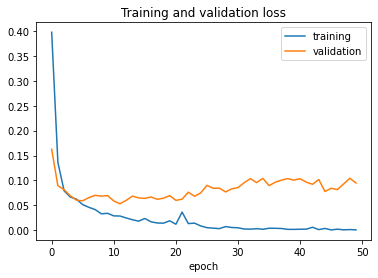

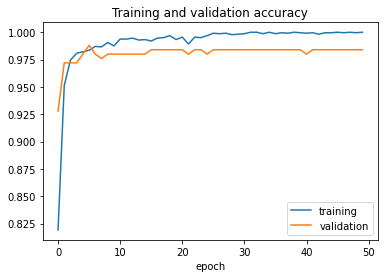

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_nn, y_test, verbose=0)
print('Accuracy on test:',test_accuracy,'\tLoss:',test_loss)

def print_graph(item):
    plt.plot(history.history[item])
    plt.plot(history.history['val_' + item])
    plt.legend(['training','validation'])
    plt.title('Training and validation '+ item)
    plt.xlabel('epoch')
    plt.show()

print_graph('loss')    
print_graph('accuracy')

In [ ]:
def _n_Rows_to_render(n_wrongs):
    if(n_wrongs <= 5):
        return 1
    if(n_wrongs <= 10):
        return 2
    if(n_wrongs <= 15):
        return 3
    if(n_wrongs <= 20):
        return 4
    
    
def test_set_results(name,pred_value):
    corr_pred = metrics.confusion_matrix(y_test,pred_value)
    import numpy as np
    n_wrongs = np.int(corr_pred[0][1] + corr_pred[1][0])
    print('> ',name,'Wrong Predictions:',n_wrongs)
    print(corr_pred)
    columns = 5
    rows = _n_Rows_to_render(n_wrongs)
    wrong_pred_fig=plt.figure(figsize=(20, 8))
    
    i = 0
    for row_index, (input, prediction, label) in enumerate(zip (X_test, pred_value, y_test)):
        if prediction != label:
            if n_wrongs <= 24:
                title = ("id:{}, Predicted: {}, Correct: {}").format(row_index,prediction,label)
                wrong_pred_fig.add_subplot(rows,columns,i + 1)
                image = X_test[row_index].reshape(150,150)
                plt.imshow(image,cmap='gray',aspect=1)
                plt.axis('off')
                plt.title(title)
                i = i + 1
            
            
    plt.show()       

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(C=35,max_iter=700, penalty='l2', verbose=0,random_state=73).fit(X_train_norm, y_train)
log_pred = log_clf.predict(X_test_norm)

from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test, log_pred))

accuracy: 0.98


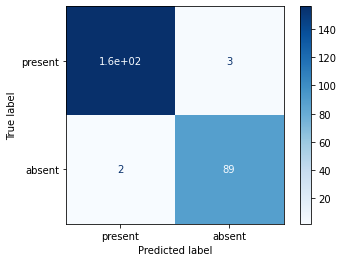

In [ ]:
disp = metrics.plot_confusion_matrix(log_clf, X_test_norm, y_test,
                                 display_labels=['present', 'absent'],
                                 cmap=plt.cm.Blues,
                                 )

Model evaluation on the test_set
>  logistic_clf Wrong Predictions: 5
[[156   3]
 [  2  89]]


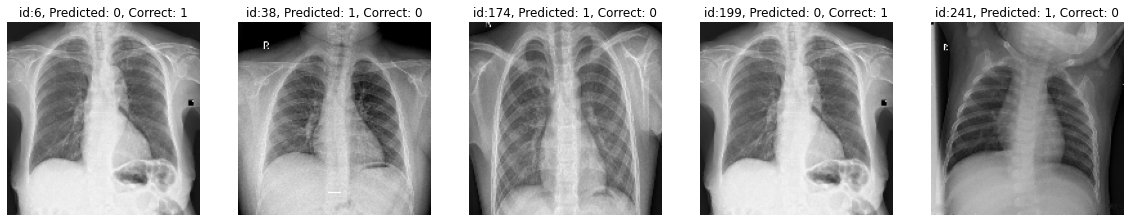

>  CNN Wrong Predictions: 4
[[157   2]
 [  2  89]]


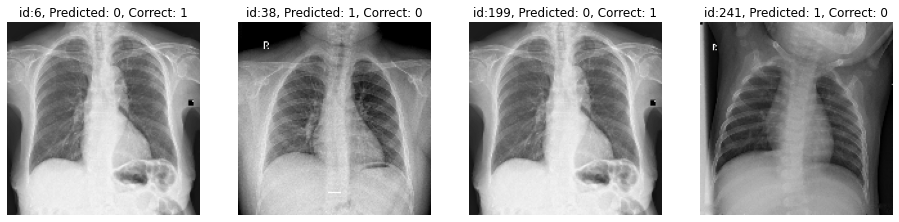

In [ ]:
print('Model evaluation on the test_set')
log_predictions = log_clf.predict(X_test_norm)
test_set_results('logistic_clf',log_predictions)

cnn_test_model = model.predict(X_test_nn)

cnn_prob = []

def getClass(prob):
    if(prob >= 0.5):
        return 1
    if(prob < 0.5):
        return 0
        
for i in range(len(X_test)):
    pred = getClass(cnn_test_model[i][0])
    cnn_prob.append(pred)
    
test_set_results('CNN',cnn_prob)

In [ ]:
def print_results(val):
  if val == 0:
    return '-ve (NORMAL)'
  if val == 1:
    return '+ve (COVID_19)'

CNN Prediction: -ve (NORMAL)
Logestic Classification: -ve (NORMAL)
Correct Answer: -ve (NORMAL)


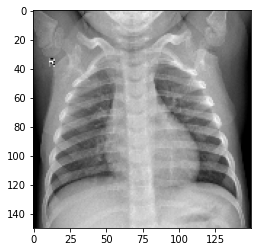

In [ ]:
image_id = 93

sample_cnn_pred = model.predict(X_test_nn[image_id].reshape(1,150,150,1))
sample_log_pred = log_clf.predict(X_test[image_id].reshape(-1, 150*150))
probability = getClass(sample_cnn_pred[0])

print('CNN Prediction:',print_results(probability))
print('Logestic Classification:',print_results(sample_log_pred[0]))
print('Correct Answer:',print_results(y_test[image_id]))

plt.imshow(X_test[image_id].reshape(150,150),cmap='gray')
plt.show()

In [ ]:
from IPython.display import FileLink
import os

In [ ]:

os.system('rm -f /content/covid_cnn_model.h5')
model.save('covid_cnn_model.h5')
FileLink(r'./covid_cnn_model.h5')

/content/covid_cnn_model.h5

In [ ]:
os.system('rm -f /content/tfjsmodel.zip && rm -f /content/my_tfjs/*')
os.system('pip install tensorflowjs')
os.system('tensorflowjs_converter --input_format=keras covid_cnn_model.h5 my_tfjs')
import shutil
shutil.make_archive('tfjsmodel', 'zip', 'my_tfjs')
FileLink(r'./tfjsmodel.zip')

/content/tfjsmodel.zip

In [ ]:
tf_lite_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()
open("covid_model_lite.tflite", "wb").write(tf_lite_model)
FileLink(r'./covid_model_lite.tflite')

INFO:tensorflow:Assets written to: /tmp/tmptg5wkkr6/assets


/content/covid_model_lite.tflite

In [ ]:
import pickle
pickle.dump(log_clf, open('covid_ml_model.pkl', 'wb'))
FileLink(r'covid_ml_model.pkl')

/content/covid_ml_model.pkl

In [ ]:
print('Saved Models :', os.listdir('/content/'))

Saved Models : ['.config', 'drive', 'covid_19.csv', 'covid_19_128.csv', 'covid_19_227.csv', 'covid_cnn_model.h5', 'covid_19_128_RGB.csv', 'covid_model_lite.tflite', 'covid_ml_model.pkl', 'tfjsmodel.zip', 'my_tfjs', 'sample_data']


In [ ]:
from IPython.display import IFrame
IFrame(src='https://model-tester.web.app/covid_19', width='100%', height=1000)

Another Method


In [ ]:
import numpy as np

In [ ]:
data1="/content/drive/MyDrive/covidxrayclass.zip"

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile(data1,"r") as  zip1:
  zip1.printdir()
  zip1.extractall()

File Name                                             Modified             Size
dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg 2020-09-20 19:49:40       367441
dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg 2020-09-20 19:49:40       813392
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg 2020-09-20 19:49:40       198740
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg 2020-09-20 19:49:40       276425
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg 2020-09-20 19:49:40       309286
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg 2020-09-20 19:49:40       191401
dataset/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg 2020-09-20 19:49:40        13456
dataset/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg 2020-09-20 19:49:40        18001
dataset/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png 2020-09-20 19:49:40       132410
dataset/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png 2020-09-20 19:49:40       148463
dataset/covid/1-s2.0-S1684118220300682-ma

In [ ]:
image_dir_path='/content/dataset'
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
training_data=data_generator.flow_from_directory(
    image_dir_path,
    seed=42,
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Validation_data=data_generator.flow_from_directory(
    image_dir_path,
    seed=42,
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 76 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [ ]:
seq_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')
])
seq_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained_seq_model=seq_model.fit_generator(
    training_data,
    epochs=10,
    validation_data=Validation_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3/3 [==============================] - 12s 1s/step - loss: 3.8777 - accuracy: 0.4816 - val_loss: 1.7158 - val_accuracy: 0.7222
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 2.7232 - accuracy: 0.6030 - val_loss: 0.6189 - val_accuracy: 0.7222
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.8154 - accuracy: 0.6180 - val_loss: 0.6635 - val_accuracy: 0.7222
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 0.5857 - accuracy: 0.7235 - val_loss: 0.5587 - val_accuracy: 0.7222
Epoch 5/10
3/3 [==============================] - 3s 998ms/step - loss: 0.5088 - accuracy: 0.7683 - val_loss: 0.4460 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 3s 989ms/step - loss: 0.5152 - accuracy: 0.8076 - val_loss: 0.3689 - val_accuracy: 0.9444
Epoch 7/10
3/3 [==============================] - 3s 947ms/step - loss: 0.4314 - accuracy: 0.8468 - val_loss: 0.2696 - val_accuracy: 0.8889
Epoch 8/10
3/3 [===============

In [ ]:
seq_model.save('covid_classifier')

INFO:tensorflow:Assets written to: covid_classifier/assets


In [ ]:
test_image=tf.keras.preprocessing.image.load_img('/content/dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',target_size=(200,200,3))
test_image=tf.keras.preprocessing.image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=seq_model.predict(test_image)
if result[0][0]==1:
    print('Tested Positive for COVID')
else:
    print('Tested Negative For COVID')

Tested Positive for COVID
